In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold , GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score

In [3]:
raw_data=pd.read_csv('bankfull.csv', delimiter=';')

In [4]:
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no






# performing EDA using ProfileReport

In [5]:
#ProfileReport(raw_data)

In [6]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Looking for numerical variables

In [7]:
numerical_feature=[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
print('number of numerical variable',len(numerical_feature))

raw_data[numerical_feature]

number of numerical variable 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


# Number variable of two type, Continues variables and discreate variable

In [8]:
discrete_feature=[feature for feature in numerical_feature if len(raw_data[feature].unique())<25 and feature not in year_feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 0


In [9]:
continue_feature=[feature for feature in numerical_feature if feature not in discrete_feature]

In [10]:
len(continue_feature)

7

In [11]:
raw_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


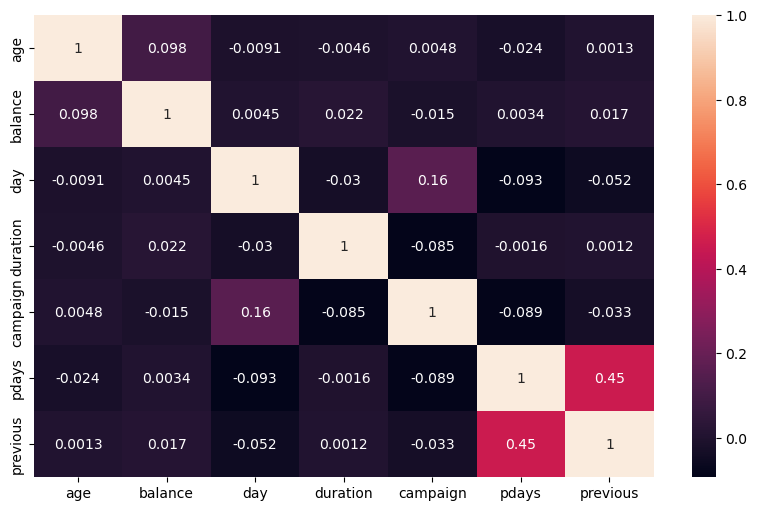

In [12]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(raw_data.corr(), annot= True);
plt.title=( "HeatMap using Seaborn Method" )
plt.show()

# Lets analyze the continuous values by creating histograms to understand the distribution of the numerical features

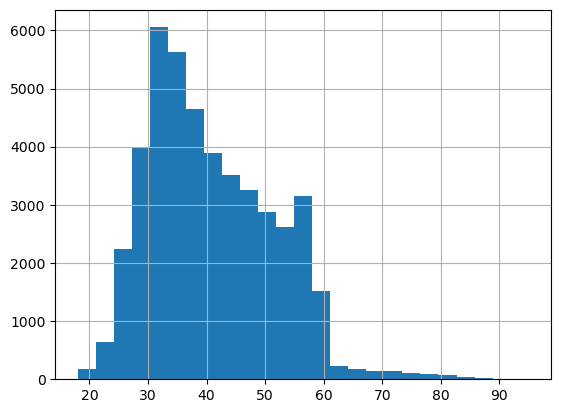

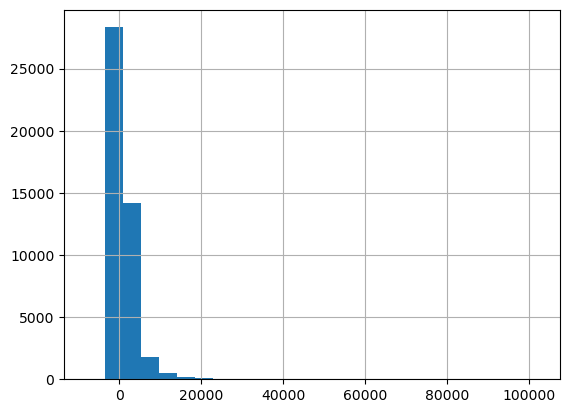

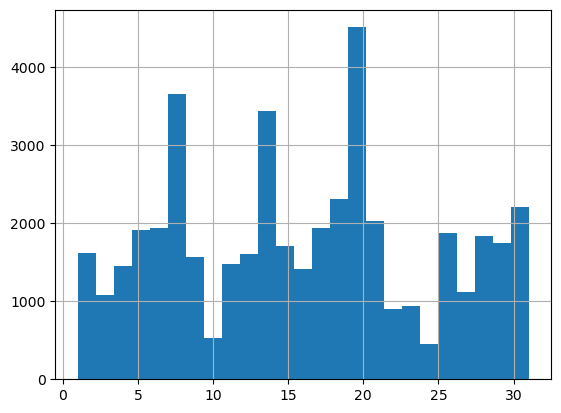

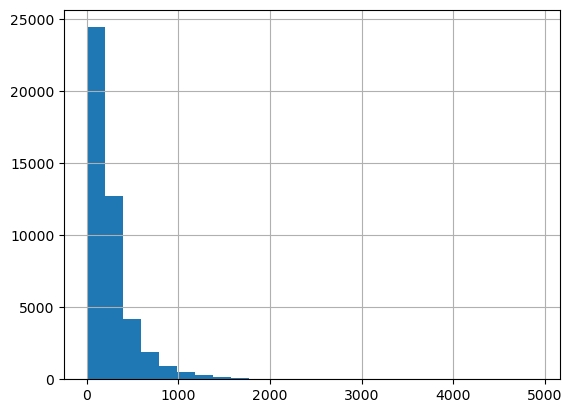

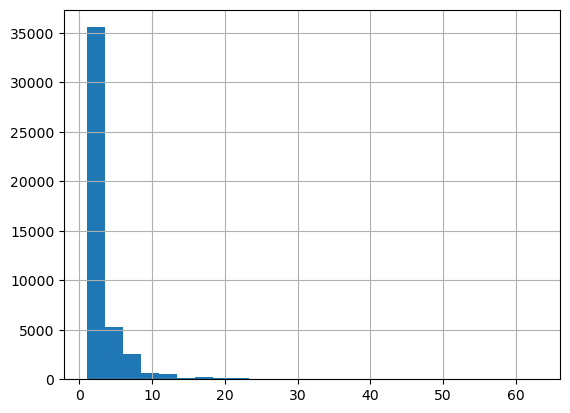

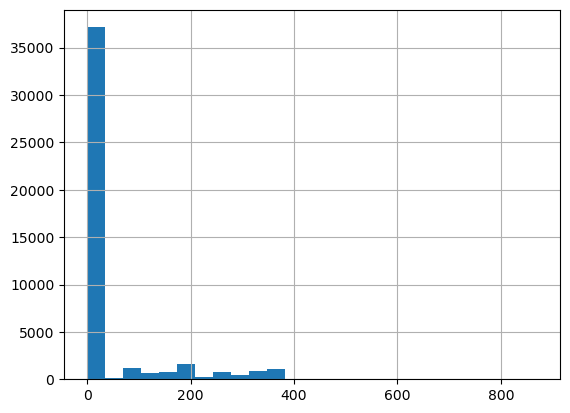

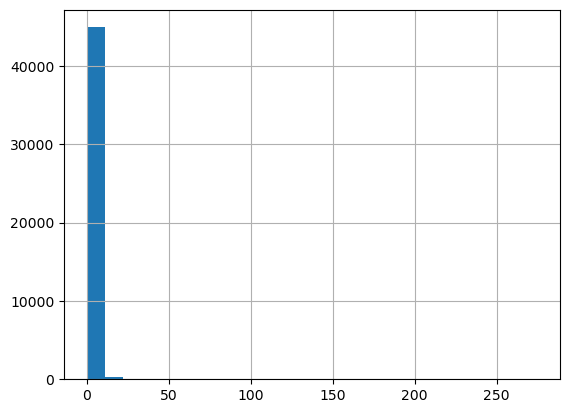

In [14]:
for feature in continue_feature:
    
    data=raw_data.copy()
    data[feature].hist(bins=25)
    plt.ylabel=('count')
    plt.title=(feature)
    plt.show()

# Log transformation

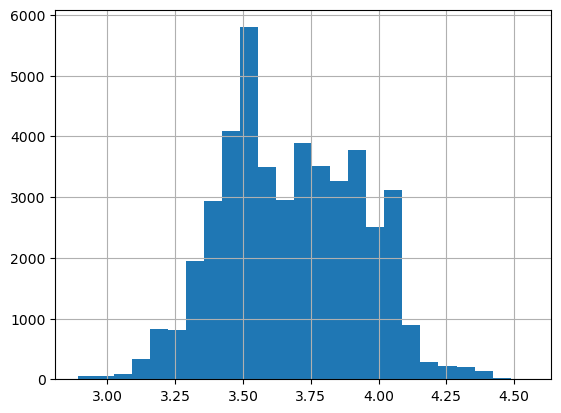

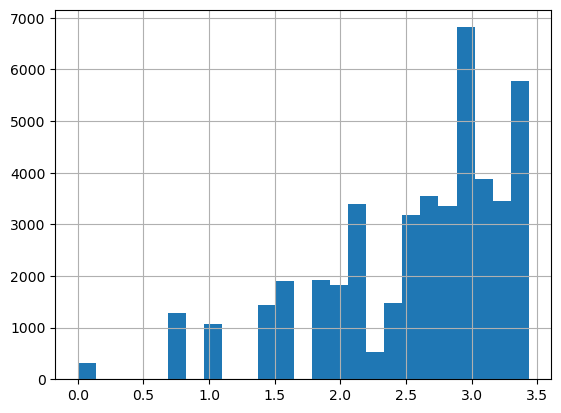

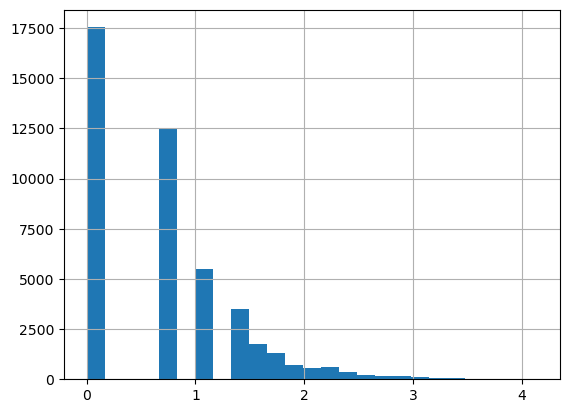

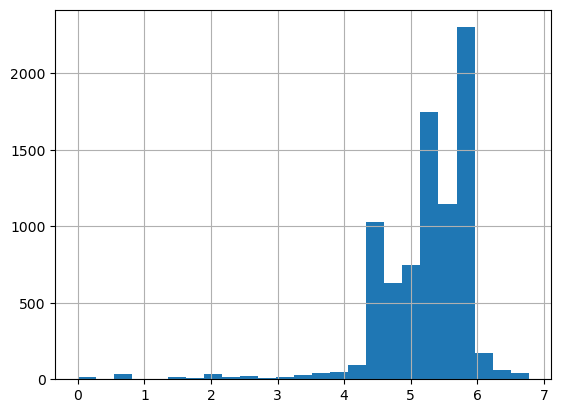

In [16]:
for feature in continue_feature:
    data=raw_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.ylabel=('count')
        plt.title=(feature)
        plt.show()

# outlier detection

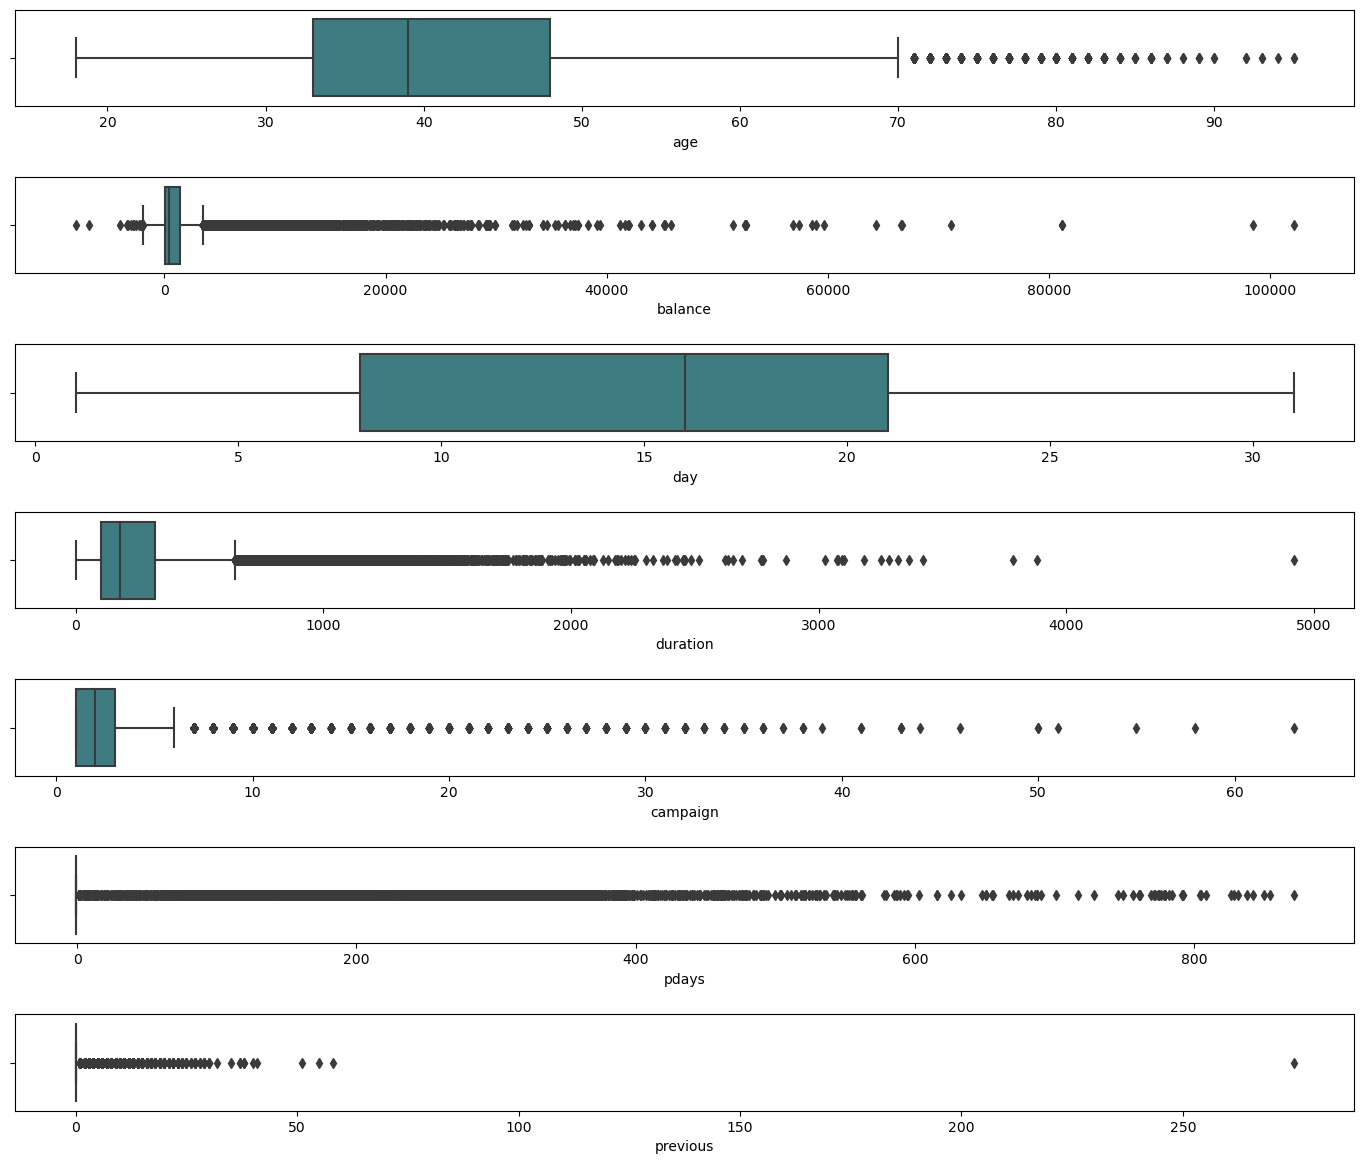

In [17]:
ot=raw_data.copy()
fig,axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

# There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building


# after log transformation

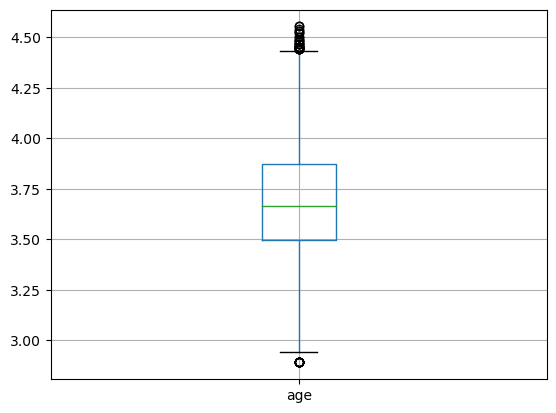

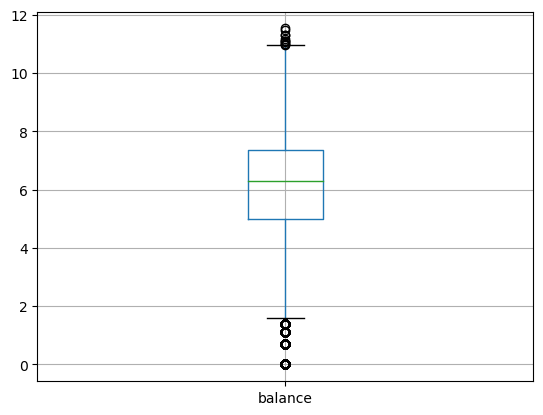

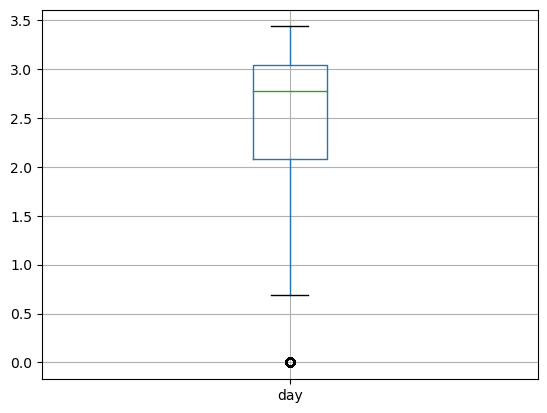

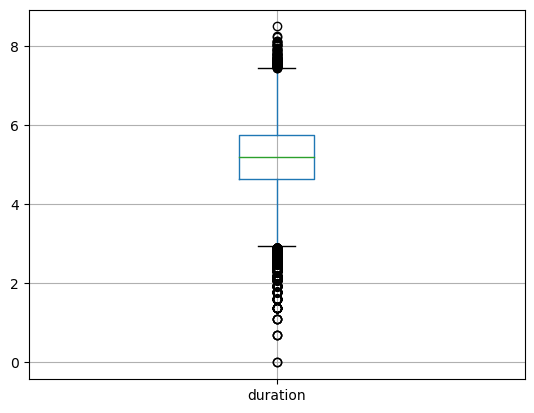

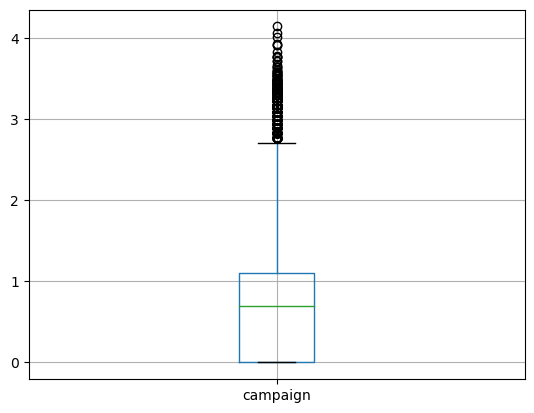

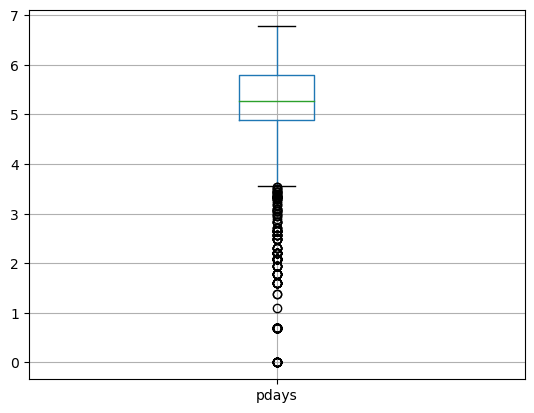

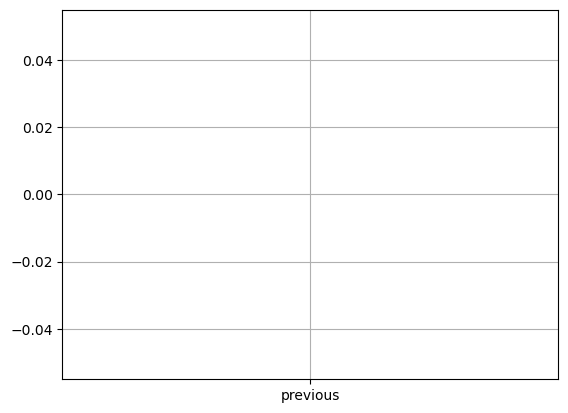

In [19]:
for feature in continue_feature:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel=(feature)
    plt.title=(feature)
    plt.show()

# Visualize the distribution of 'age' and 'balance'

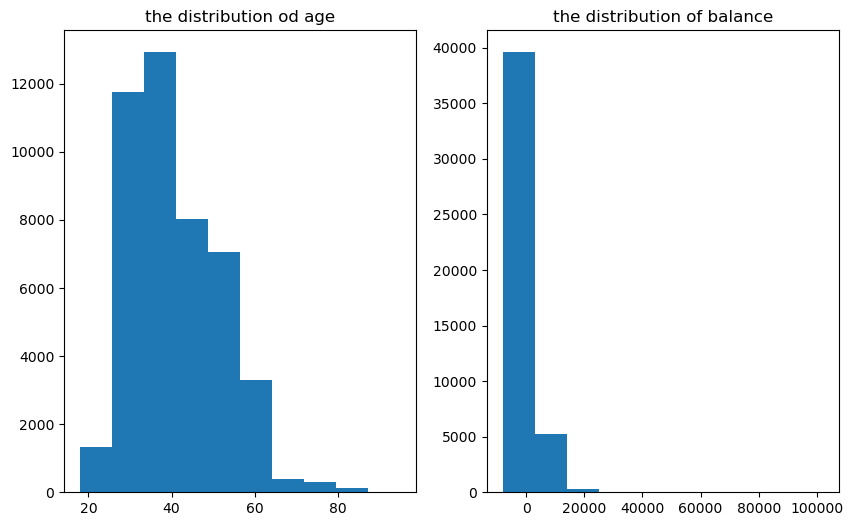

In [20]:
dist_age_bal=plt.figure(figsize=(10,6))
ra1=dist_age_bal.add_subplot(1,2,1)
ra2=dist_age_bal.add_subplot(1,2,2)
ra1.hist(raw_data['age'])
ra1.set_title('the distribution od age')

ra2.hist(raw_data['balance'])
ra2.set_title('the distribution of balance')
plt.show()

In [21]:
raw_data[['age','balance']].describe()

,age,balance
count,45211.000000,45211.000000
mean,40.936210,1362.272058
std,10.618762,3044.765829
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,102127.000000


# visualize the distribution of duration and campaign

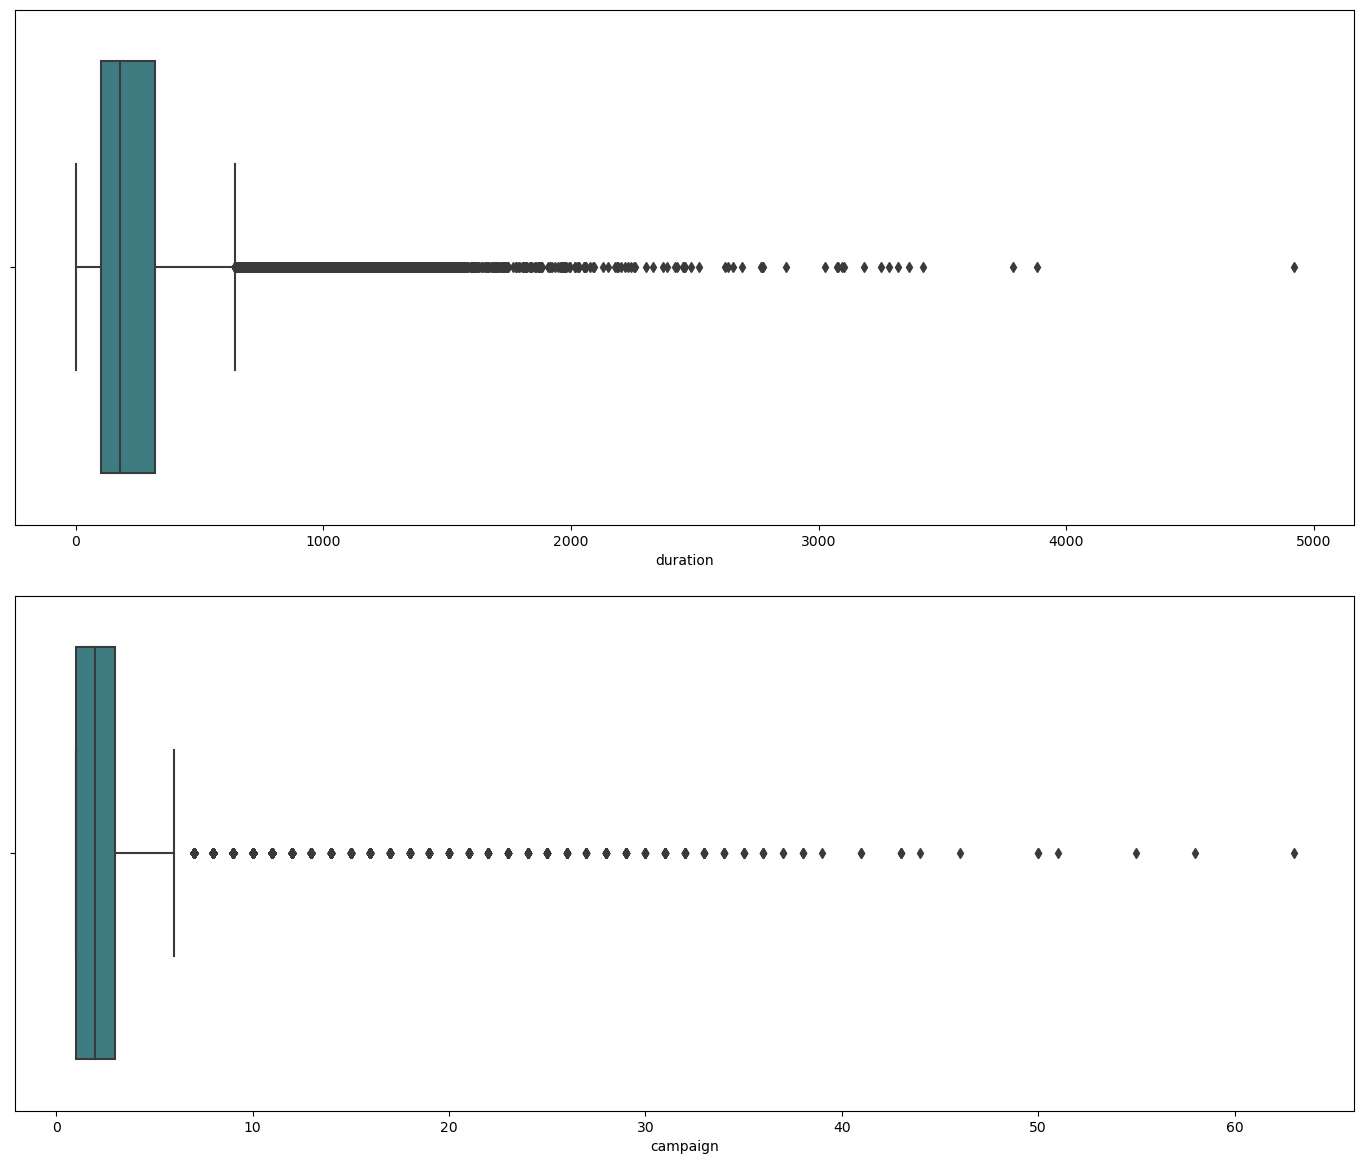

In [22]:
ot1=raw_data.copy() 
fig, axes=plt.subplots(2,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='duration',data=ot1,palette='crest',ax=axes[0])
sns.boxplot(x='campaign',data=ot1,palette='crest',ax=axes[1])
plt.tight_layout(pad=2.0)

In [23]:
ot1[['duration','campaign']].describe()

,duration,campaign
count,45211.000000,45211.000000
mean,258.163080,2.763841
std,257.527812,3.098021
min,0.000000,1.000000
25%,103.000000,1.000000
50%,180.000000,2.000000
75%,319.000000,3.000000
max,4918.000000,63.000000


# Now let's look how numerical columns affect term deposit subscription.

In [24]:
b_df=pd.DataFrame()
b_df['balance_yes']=(raw_data[raw_data['y']=='yes'][['y','balance']].describe())
b_df['balance_no']=(raw_data[raw_data['y']=='no'][['y','balance']].describe())
b_df

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'balance and deposit stats'}>

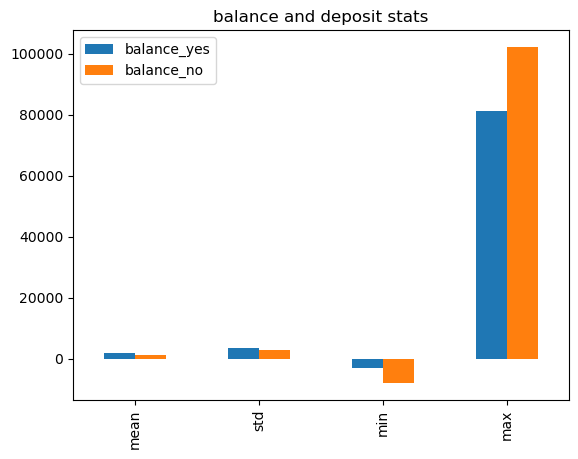

In [25]:
b_df.drop(['count','25%','50%','75%']).plot.bar(title='balance and deposit stats')

In [26]:
a_df = pd.DataFrame()
a_df['age_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (raw_data[raw_data['y'] == 'no'][['y','age']].describe())['age']

a_df


,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

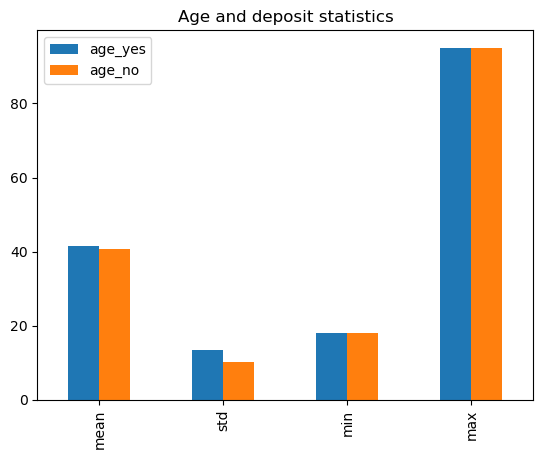

In [27]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [28]:
#number of contacts performed during this campaign ('campaign') and deposit
c_df = pd.DataFrame()
c_df['campaign_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (raw_data[raw_data['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df


,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

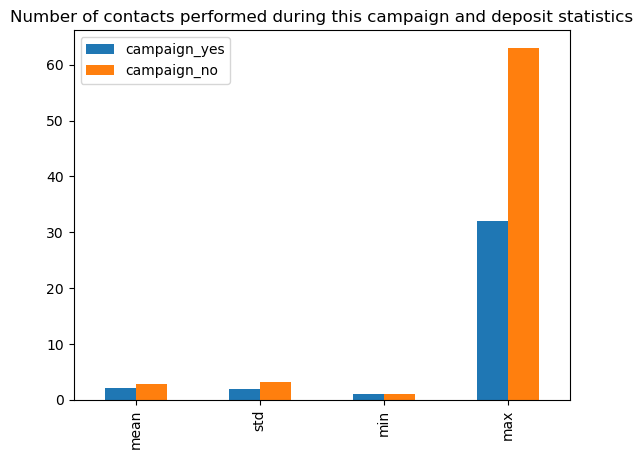

In [29]:
c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [30]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (raw_data[raw_data['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (raw_data[raw_data['y'] == 'no'][['y','previous']].describe())['previous']

p_df

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Number of contacts performed during previous campaign and deposit statistics'}>

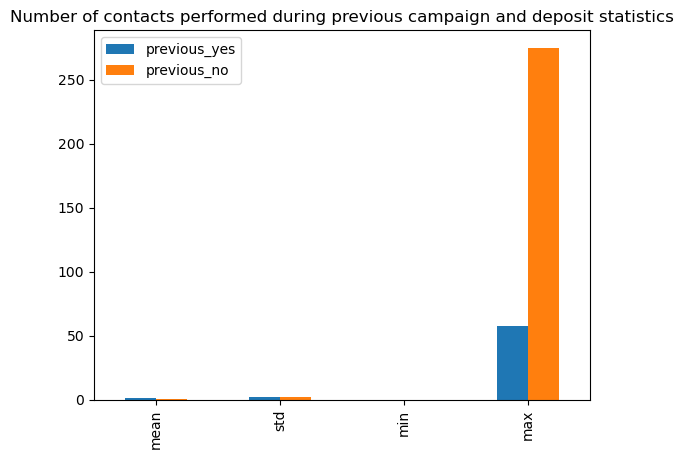

In [31]:
p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

# People who subscribed for term deposit tend to have greater balance and age values. People who subscribed for term deposit tend to have fewer number of contacts during this campaign.


# Lets go for categorical data

In [32]:
categorical_feature=[feature for feature in raw_data.columns if raw_data[feature].dtypes=='O']
len(categorical_feature)

10

In [33]:
raw_data[categorical_feature]

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [34]:
for feature in categorical_feature:
    print('{} number of unique categories in feature named {}'.format(len(raw_data[feature].unique()), feature)) 

12 number of unique categories in feature named job
3 number of unique categories in feature named marital
4 number of unique categories in feature named education
2 number of unique categories in feature named default
2 number of unique categories in feature named housing
2 number of unique categories in feature named loan
3 number of unique categories in feature named contact
12 number of unique categories in feature named month
4 number of unique categories in feature named poutcome
2 number of unique categories in feature named y


TypeError: 'str' object is not callable

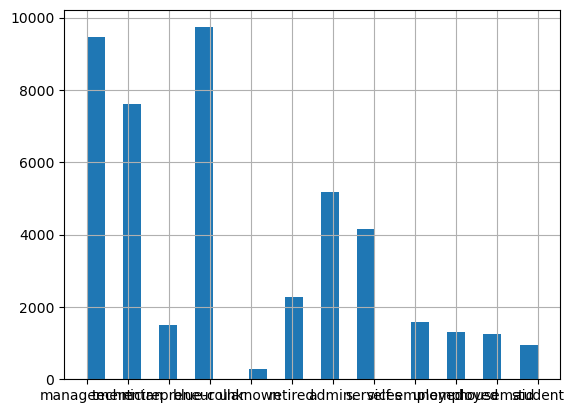

In [35]:
for feature in categorical_feature:
    data=raw_data.copy()
    data[feature].hist(bins=25)
    plt.ylabels=('count')
    plt.title(feature)
    plt.show()

# bar plot for all categorical variable in the dataset

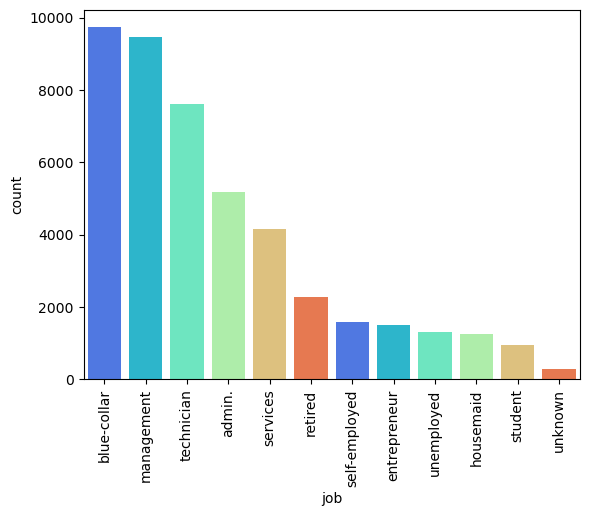

In [36]:
pal=sns.color_palette('rainbow')
sns.countplot(x='job',data=raw_data,palette=pal,order=raw_data['job'].value_counts().index,)
plt.xticks(rotation=90,fontsize=10)
plt.show()

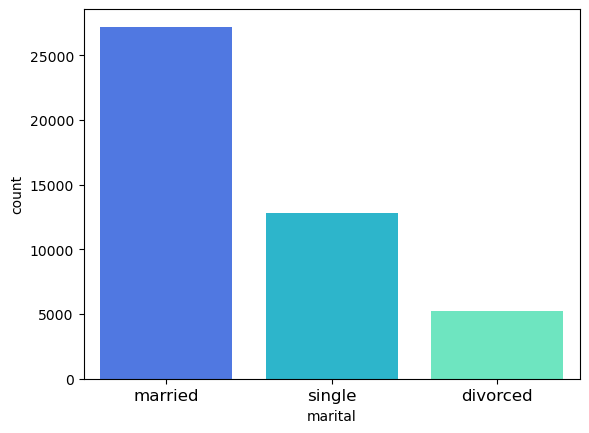

In [40]:
sns.countplot(x='marital',data=raw_data,palette=pal,order=raw_data['marital'].value_counts().index)
plt.xticks(fontsize=12)
plt.title=('marital Status')

<AxesSubplot:xlabel='education', ylabel='count'>

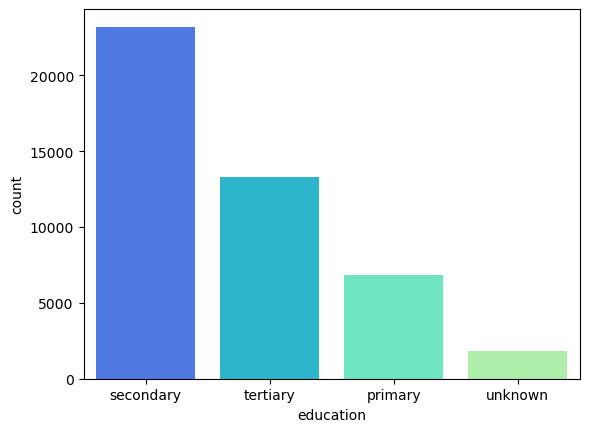

In [41]:
sns.countplot(x='education',data=raw_data,palette=pal,order=raw_data['education'].value_counts().index)

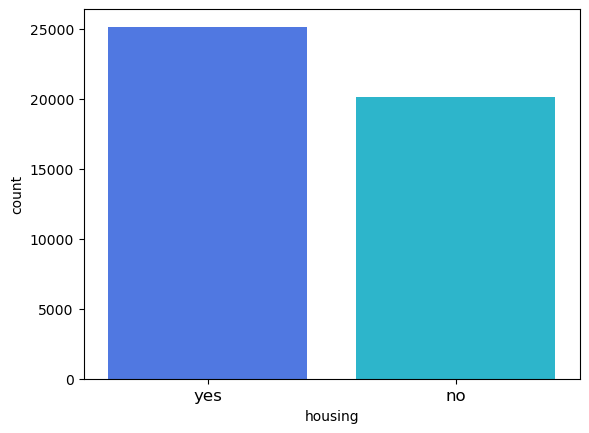

In [43]:
sns.countplot(x='housing', data=raw_data, palette = pal, 
              order=raw_data['housing'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title=('Housing')

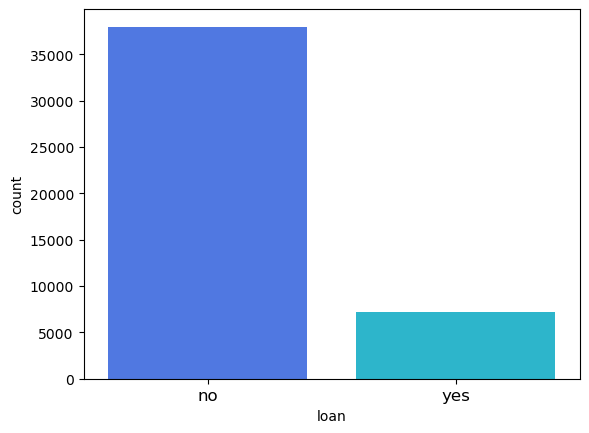

In [47]:
sns.countplot(x='loan', data=raw_data, palette = pal, 
              order=raw_data['loan'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title=('Loan')

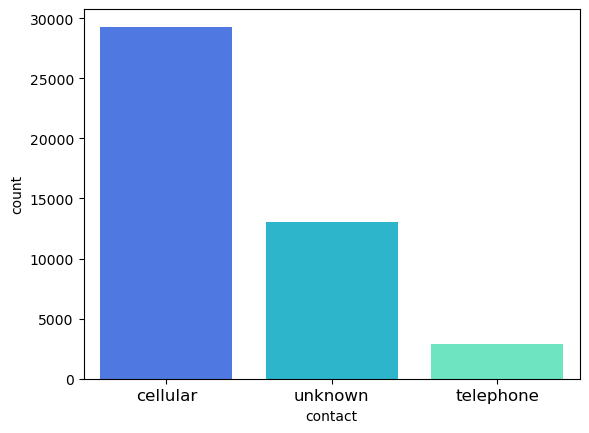

In [48]:
sns.countplot(x='contact', data=raw_data, palette = pal, 
              order=raw_data['contact'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title=('contact')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'may'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'aug'),
  Text(3, 0, 'jun'),
  Text(4, 0, 'nov'),
  Text(5, 0, 'apr'),
  Text(6, 0, 'feb'),
  Text(7, 0, 'jan'),
  Text(8, 0, 'oct'),
  Text(9, 0, 'sep'),
  Text(10, 0, 'mar'),
  Text(11, 0, 'dec')])

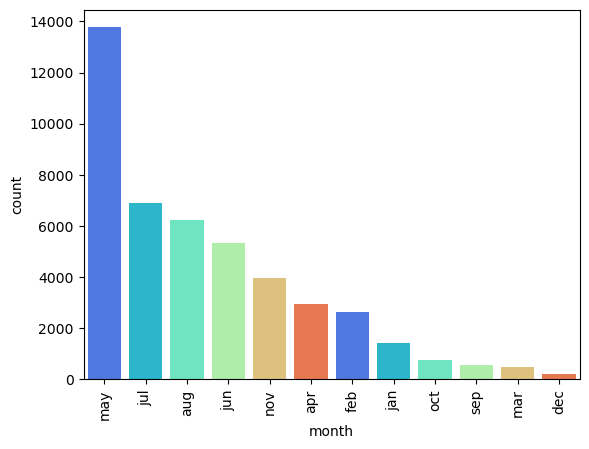

In [49]:
sns.countplot(x='month',data=raw_data,palette=pal,order=raw_data['month'].value_counts().index)
plt.xticks(rotation=90)

# Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.


# Here, the class “No” is called the majority class, and the much smaller in size “Yes” class is called the minority class.

# DATA VISUALIZATION

In [50]:
j_df=pd.DataFrame()
j_df['yes']=raw_data[raw_data['y']=='yes']['job'].value_counts()
j_df['no']=raw_data[raw_data['y']=='no']['job'].value_counts()

j_df.head()


,yes,no
management,1301,8157
technician,840,6757
blue-collar,708,9024
admin.,631,4540
retired,516,1748


<AxesSubplot:title={'center':'job and deposite'}>

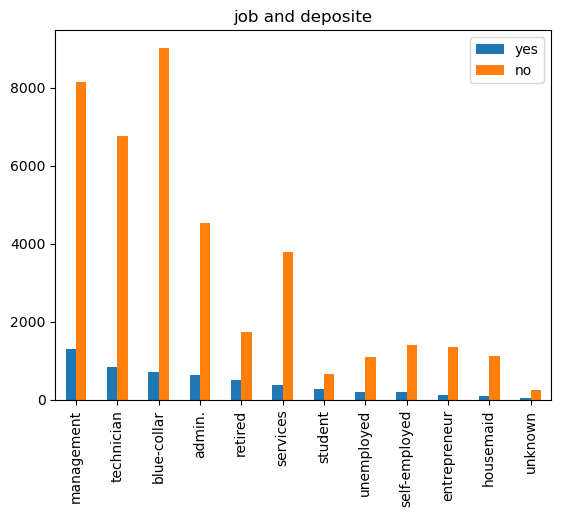

In [51]:

j_df.plot.bar(title='job and deposite')

<AxesSubplot:xlabel='y', ylabel='job'>

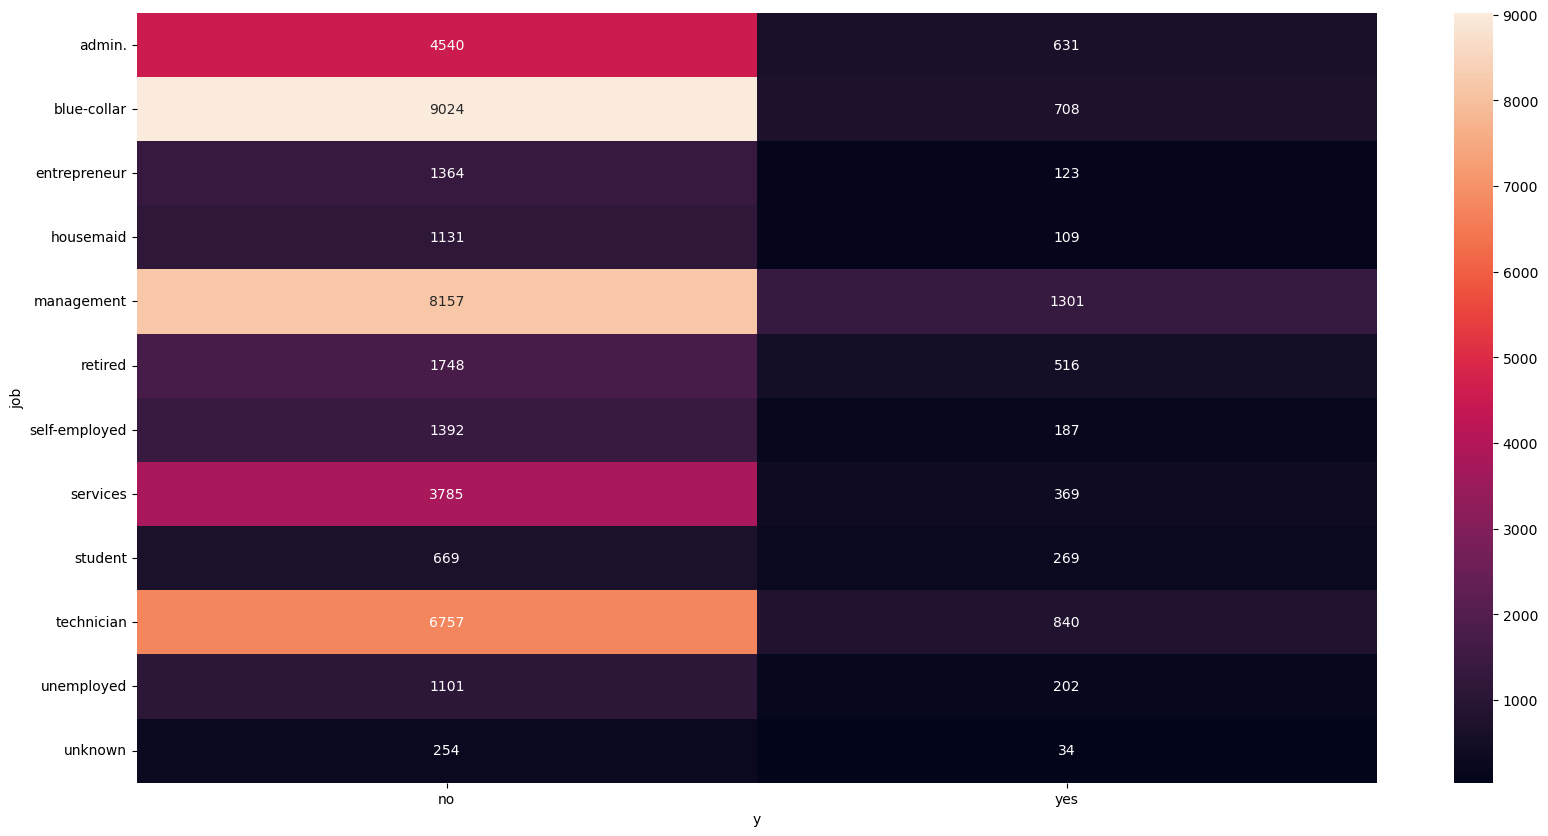

In [52]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(index=raw_data['job'],columns=raw_data['y']),annot=True,fmt='g')

<AxesSubplot:title={'center':'marital and deposite'}>

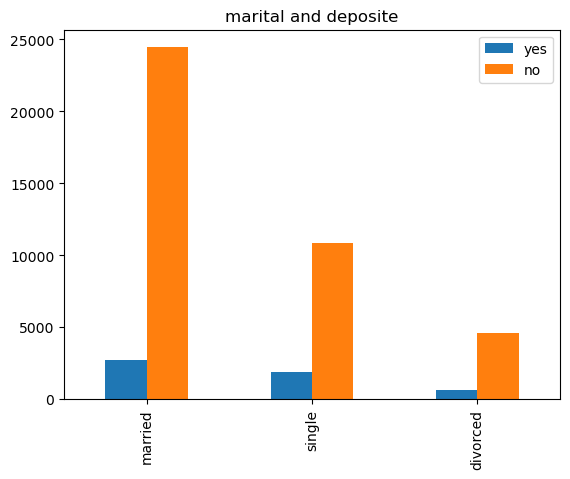

In [53]:
m_df=pd.DataFrame()
m_df['yes']=raw_data[raw_data['y']=='yes']['marital'].value_counts()
m_df['no']=raw_data[raw_data['y']=='no']['marital'].value_counts()
m_df.plot.bar(title='marital and deposite')

<AxesSubplot:xlabel='y', ylabel='marital'>

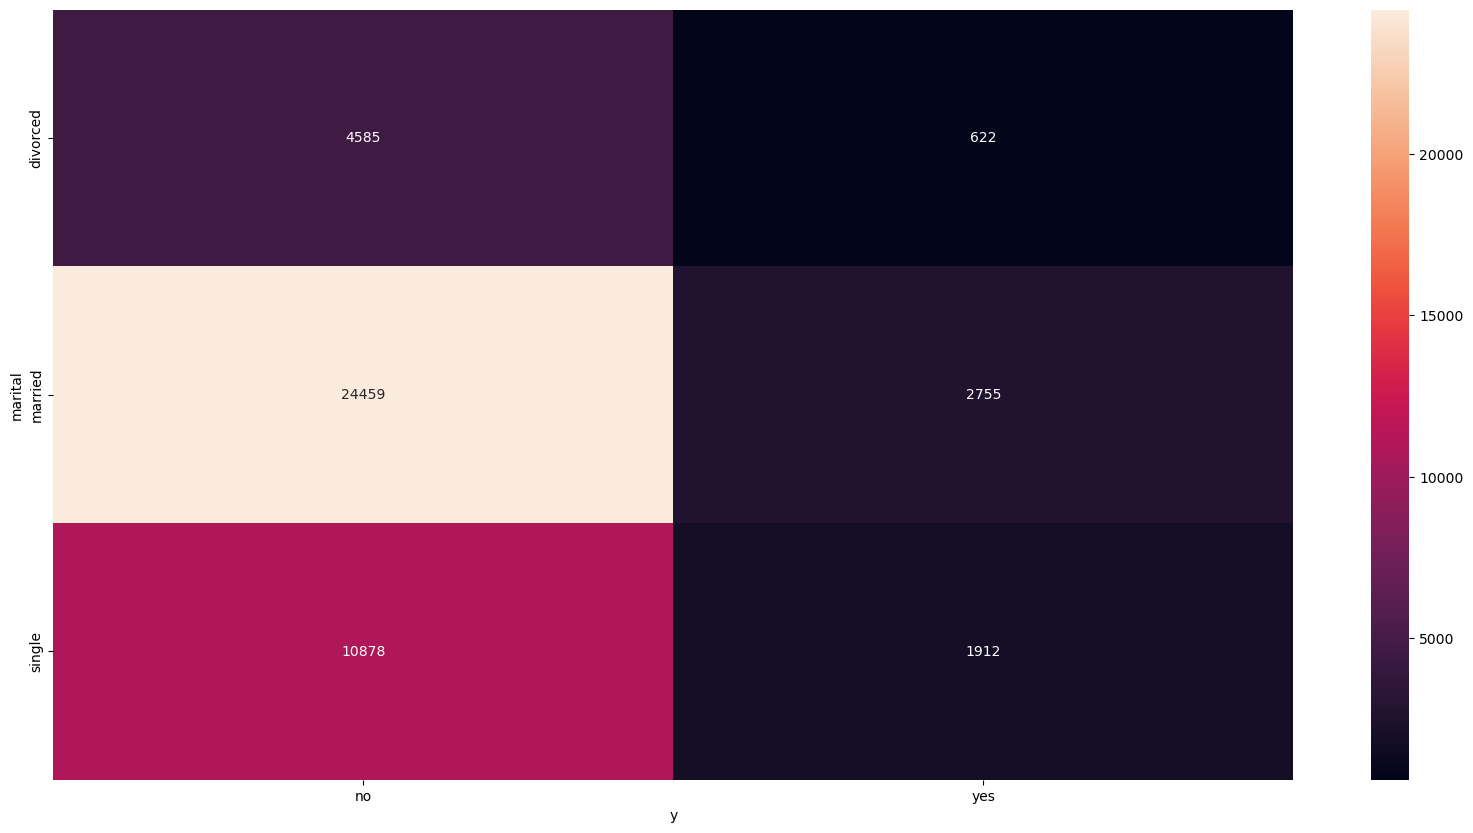

In [54]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(index=raw_data['marital'],columns=raw_data['y']),annot=True, fmt='g')

<AxesSubplot:title={'center':'Education and deposit'}>

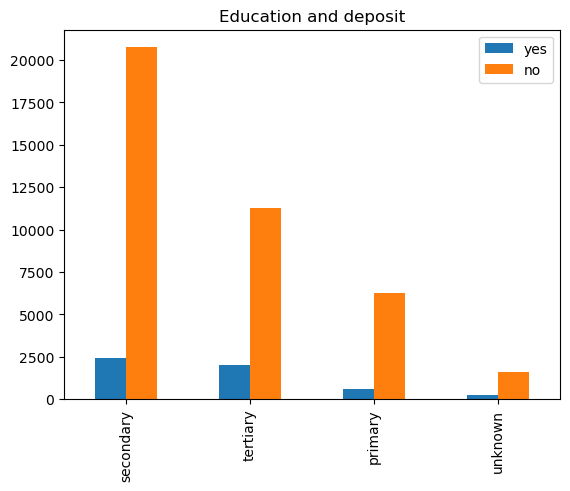

In [55]:
#education and deposit
e_df = pd.DataFrame()

e_df['yes'] = raw_data[raw_data['y'] == 'yes']['education'].value_counts()
e_df['no'] = raw_data[raw_data['y'] == 'no']['education'].value_counts()

e_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:xlabel='y', ylabel='education'>

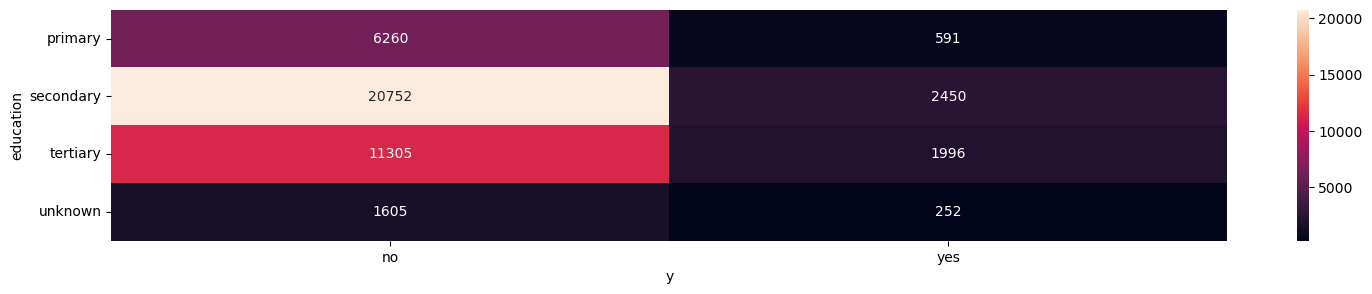

In [56]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['education'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

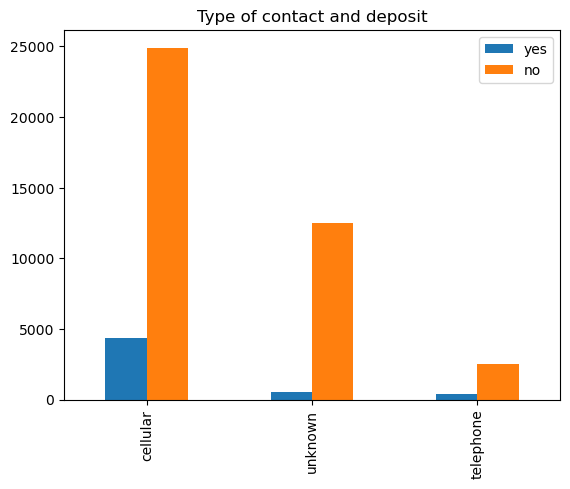

In [57]:
#type of contact and deposit
c_df = pd.DataFrame()

c_df['yes'] = raw_data[raw_data['y'] == 'yes']['contact'].value_counts()
c_df['no'] = raw_data[raw_data['y'] == 'no']['contact'].value_counts()

c_df.plot.bar(title = 'Type of contact and deposit')

<AxesSubplot:xlabel='y', ylabel='contact'>

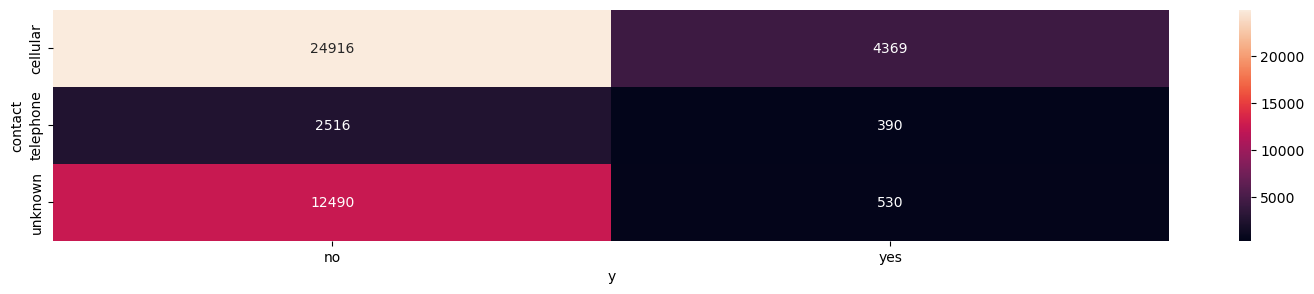

In [58]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['contact'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Type of possible outcome and deposit'}>

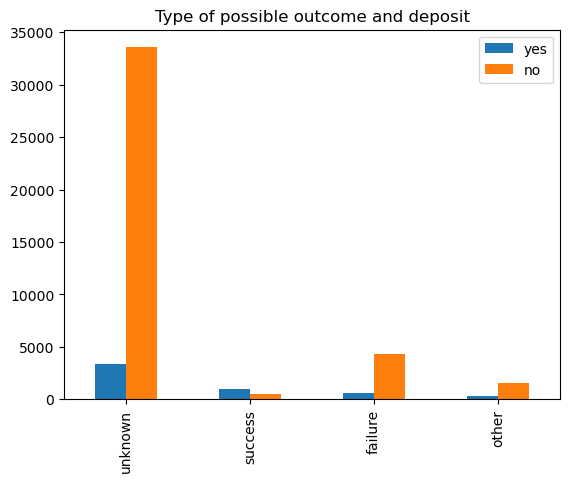

In [59]:
#type of poutcome and deposit
p_df = pd.DataFrame()

p_df['yes'] = raw_data[raw_data['y'] == 'yes']['poutcome'].value_counts()
p_df['no'] = raw_data[raw_data['y'] == 'no']['poutcome'].value_counts()

p_df.plot.bar(title = 'Type of possible outcome and deposit')

<AxesSubplot:xlabel='y', ylabel='poutcome'>

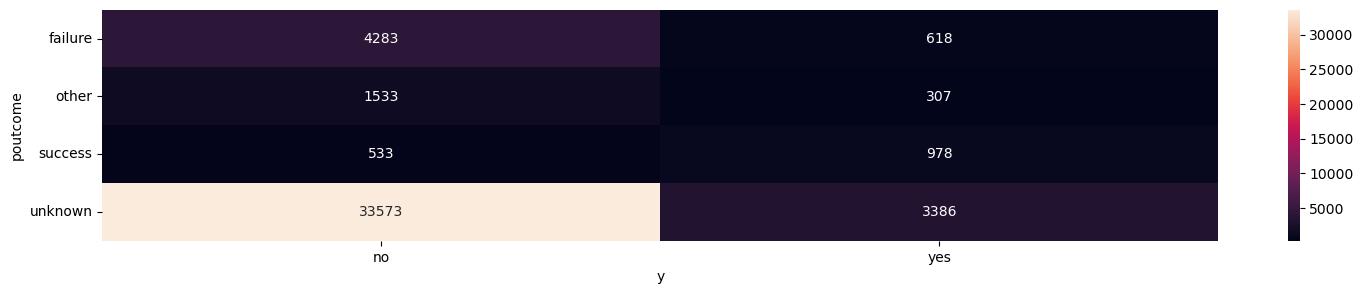

In [60]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['poutcome'], columns=raw_data['y']), annot=True, 
            fmt='g')

<AxesSubplot:title={'center':'Loan and deposit'}>

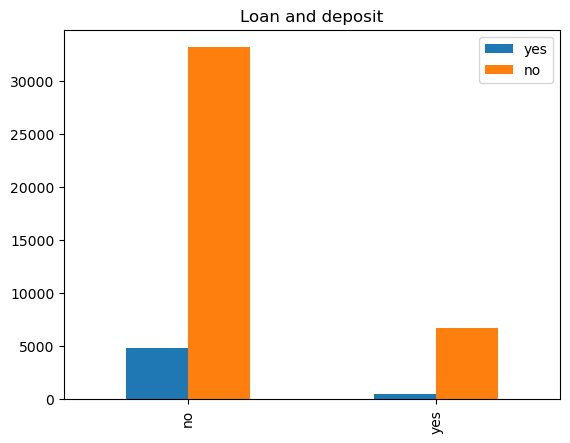

In [61]:
#type of loan and deposit
l_df = pd.DataFrame()

l_df['yes'] = raw_data[raw_data['y'] == 'yes']['loan'].value_counts()
l_df['no'] = raw_data[raw_data['y'] == 'no']['loan'].value_counts()

l_df.plot.bar(title = 'Loan and deposit')

<AxesSubplot:xlabel='y', ylabel='loan'>

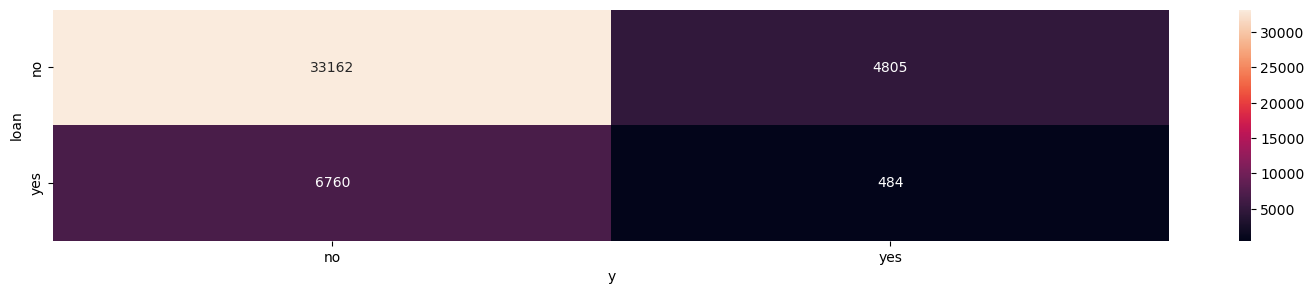

In [62]:
fig= plt.figure(figsize=(18, 3))
sns.heatmap(pd.crosstab(index=raw_data['loan'], columns=raw_data['y']), annot=True, 
            fmt='g')

# Cleaningthe dataset

# There is no missing value in this dataset. Nevertheless, there are values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [63]:
cols=[cols for cols in raw_data.columns]
col_missing=[]
for cols in cols:
    if 'unknown' in raw_data[cols].values:
        col_missing.append(cols)
print('columns with unknow values', col_missing)

columns with unknow values ['job', 'education', 'contact', 'poutcome']


In [64]:
print('unknow values count')
for cols in col_missing:
    print(cols,'-',raw_data[raw_data[cols].str.contains('unknown')][cols].count())

unknow values count
job - 288
education - 1857
contact - 13020
poutcome - 36959


In [65]:
print(raw_data.groupby(raw_data['job'])['job'].count())

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64


In [66]:
print(raw_data.groupby(raw_data['education'])['education'].count())

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64


In [67]:
print(raw_data.groupby(raw_data['poutcome'])['poutcome'].count(),"\n")

poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



In [68]:
print(raw_data.groupby(raw_data['contact'])['contact'].count(),"\n")

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 



In [69]:
raw_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# creating and transforming the data

In [70]:
df=raw_data.copy()

In [71]:
df[['job','education','contact','poutcome']]=df[['job','education','contact','poutcome']].replace(['unknown'],'other')

In [72]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,other,no
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,other,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,other,no
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,-1,0,other,no
4,33,other,single,other,no,1,no,no,other,5,may,198,1,-1,0,other,no


In [73]:
df.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

#  Custom Binary Encoding of Binary o/p variables 

In [74]:
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)


In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,other,5,may,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,may,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,may,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,may,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,may,198,1,-1,0,other,0


# Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.¶

In [76]:
categorical=df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,other,may,other
1,technician,single,secondary,other,may,other
2,entrepreneur,married,secondary,other,may,other
3,blue-collar,married,other,other,may,other
4,other,single,other,other,may,other


In [77]:
# dummy variables of all categorical columns

dummies=pd.get_dummies(categorical)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [78]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [79]:
pd.set_option('display.max.columns', None)

In [80]:
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [81]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [82]:
df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']]=df[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_other',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_other',
       'education_primary', 'education_secondary', 'education_tertiary',
       'contact_cellular', 'contact_other', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  int64
 12  job_blue-collar      45211 non-null  int64
 13  job_entrepreneur     45211 non-null  int64
 14  job_housemaid        45211 non-null  int64
 15  job_management       45211 non-null  int64
 16  job_other            4

In [83]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

In [84]:
#label encoding of categorical variable
from sklearn import preprocessing

#label_encoder object knows how to understand word label

label_encoder=preprocessing.LabelEncoder()
raw_data['job']=label_encoder.fit_transform(raw_data['job'])
raw_data['marital']= label_encoder.fit_transform(raw_data['marital'])
raw_data['education']= label_encoder.fit_transform(raw_data['education'])
raw_data['contact']= label_encoder.fit_transform(raw_data['contact'])
raw_data['poutcome']= label_encoder.fit_transform(raw_data['poutcome'])
raw_data.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,no,29,yes,no,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,no,2,yes,yes,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,no,1506,yes,no,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,no,1,no,no,2,5,may,198,1,-1,0,3,no
5,35,4,1,2,no,231,yes,no,2,5,may,139,1,-1,0,3,no
6,28,4,2,2,no,447,yes,yes,2,5,may,217,1,-1,0,3,no
7,42,2,0,2,yes,2,yes,no,2,5,may,380,1,-1,0,3,no
8,58,5,1,0,no,121,yes,no,2,5,may,50,1,-1,0,3,no
9,43,9,2,1,no,593,yes,no,2,5,may,55,1,-1,0,3,no


In [85]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Applying Standard Scaler

# For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

In [86]:
from sklearn.preprocessing import StandardScaler

df_standard_scaled=df.copy()
column_name=['balance','age','duration']
features=df_standard_scaled[column_name]
rest=[columns for columns in df.columns if columns not in column_name ]

scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)
df_standard_scaled=pd.DataFrame(features,columns=column_name)
df_standard_scaled[rest]=df[rest]
df_standard_scaled.head()


,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011016,0,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,-0.437895,0.288529,-0.416127,0,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,0,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.047205,0.571051,-0.645231,0,1,0,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233620,0,0,0,5,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# feature selection

# We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [87]:
x=df_standard_scaled.drop('y',1)

In [88]:
x.head()

,balance,age,duration,default,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,contact_cellular,contact_other,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011016,0,1,0,5,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,-0.437895,0.288529,-0.416127,0,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.446762,-0.747384,-0.707361,0,1,1,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0.047205,0.571051,-0.645231,0,1,0,5,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.447091,-0.747384,-0.233620,0,0,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [89]:
y=df_standard_scaled['y']

In [90]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [91]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36168, 47)
Shape of X_test:  (9043, 47)
Shape of y_train:  (36168,)
Shape of y_test (9043,)


In [93]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [94]:
# Model to Test
classifier = LogisticRegression()

# Select Best X Features
rfe = RFE(classifier,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [95]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False  True False
  True  True  True  True False  True  True  True  True  True  True]
[22 32  1 30  1  3 31 19 33 28 13 17 12  8 25 16  6 24 18  1 27 15 20  9
 29 26  7 23 14  4  1  5 21  2  1 11  1  1  1  1 10  1  1  1  1  1  1]


In [96]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('balance', False, 22),
 ('age', False, 32),
 ('duration', True, 1),
 ('default', False, 30),
 ('housing', True, 1),
 ('loan', False, 3),
 ('day', False, 31),
 ('campaign', False, 19),
 ('pdays', False, 33),
 ('previous', False, 28),
 ('job_admin.', False, 13),
 ('job_blue-collar', False, 17),
 ('job_entrepreneur', False, 12),
 ('job_housemaid', False, 8),
 ('job_management', False, 25),
 ('job_other', False, 16),
 ('job_retired', False, 6),
 ('job_self-employed', False, 24),
 ('job_services', False, 18),
 ('job_student', True, 1),
 ('job_technician', False, 27),
 ('job_unemployed', False, 15),
 ('marital_divorced', False, 20),
 ('marital_married', False, 9),
 ('marital_single', False, 29),
 ('education_other', False, 26),
 ('education_primary', False, 7),
 ('education_secondary', False, 23),
 ('education_tertiary', False, 14),
 ('contact_cellular', False, 4),
 ('contact_other', True, 1),
 ('contact_telephone', False, 5),
 ('month_apr', False, 21),
 ('month_aug', False, 2),
 ('month_d

In [97]:
x_train.columns[rfe.support_]

Index(['duration', 'housing', 'job_student', 'contact_other', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [98]:
x_train.columns[~rfe.support_]

Index(['balance', 'age', 'default', 'loan', 'day', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_other', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_feb', 'month_may'],
      dtype='object')

In [99]:
import statsmodels.api as sm

In [100]:
col1 = x_train.columns[rfe.support_]
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36153
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8753.0
Date:                Tue, 12 Sep 2023   Deviance:                       17506.
Time:                        15:34:19   Pearson chi2:                 1.62e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2111
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8741      0.032    -27.738      0.000      -0.936      -0.812
duration             1.0883      0.018     59.039      0.000       1.052       1.124
housing             -0.6538      0.044    -14.941      0.000      -0.740      -0.568
job_student          0.7082      0.104      6.842      0.000       0.505       0.911
contact_other       -1.8259      0.078    -23.315      0.000      -1.979      -1.672
month_dec            1.1853      0.181      6.537      0.000       0.830       1.541
month_jan           -0.5710      0.117     -4.863      0.000      -0.801      -0.341
month_jul           -0.5700      0.063     -9.019      0.000      -0.694      -0.446
month_jun            0.9082      0.080     11.377      0.000       0.752       1.065
month_mar            2.1601      0.118     18.366      0.000       1.930       2.391
month_nov           -0.4213      0.074     -5.688      0.000      -0.567      -0.276
month_oct            1.4569      0.106     13.713      0.000       1.249       1.665
month_sep            1.4589      0.120     12.184      0.000       1.224       1.694
poutcome_failure    -1.0432      0.048    -21.918      0.000      -1.136      -0.950
poutcome_other      -1.1696      0.030    -38.869      0.000      -1.229      -1.111
poutcome_success     1.3386      0.055     24.549      0.000       1.232       1.446
====================================================================================
"""

# We can see that none of the variables here have high p-values i.e. greater than 0.05. So there is do not need to drop any of the features before moving ahead

In [101]:
# predicted values of the train dataset giving the probability
x_test_sm = sm.add_constant(x_test[col1])
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

14001    0.018454
32046    0.678343
13318    0.064300
42991    0.038483
14237    0.049484
14360    0.021599
36635    0.050462
37042    0.033097
25994    0.048280
14555    0.028432
dtype: float64

In [102]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.01845388, 0.67834328, 0.06430027, 0.03848295, 0.04948354,
       0.02159921, 0.05046177, 0.03309678, 0.04828012, 0.02843184])

# Creating the dataframe with the actual subscription flag and the predicted probabilities

In [103]:
y_test_pred_final = pd.DataFrame({'Sub':y_test.values,'Sub_prob':y_test_pred})
y_test_pred_final['Cust_id'] = y_test.index
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.018454,14001
1,1,0.678343,32046
2,0,0.064300,13318
3,0,0.038483,42991
4,0,0.049484,14237
5,0,0.021599,14360
6,0,0.050462,36635
7,0,0.033097,37042
8,0,0.048280,25994
9,0,0.028432,14555


# Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [104]:
y_test_pred_final['predict'] = y_test_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.018454,14001,0
1,1,0.678343,32046,1
2,0,0.064300,13318,0
3,0,0.038483,42991,0
4,0,0.049484,14237,0
5,0,0.021599,14360,0
6,0,0.050462,36635,0
7,0,0.033097,37042,0
8,0,0.048280,25994,0
9,0,0.028432,14555,0


In [105]:
# creating confusion matrix for the following prediction
confusion = cm(y_test_pred_final.Sub, y_test_pred_final.predict)
confusion

array([[7763,  217],
       [ 693,  370]], dtype=int64)

In [106]:
print(ac(y_test_pred_final.Sub, y_test_pred_final.predict))

0.8993696782041358


# The accuracy of the model is approximately 90% which is a really good model for prediction

In [107]:
# print the classification report
print('After Feature Selection','\n',report(y_test_pred_final.Sub, y_test_pred_final.predict))

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [108]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1])
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel=('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [109]:
fpr, tpr, thresholds = roc_curve(y_test_pred_final.Sub, y_test_pred_final.Sub_prob,drop_intermediate=False)

TypeError: 'str' object is not callable

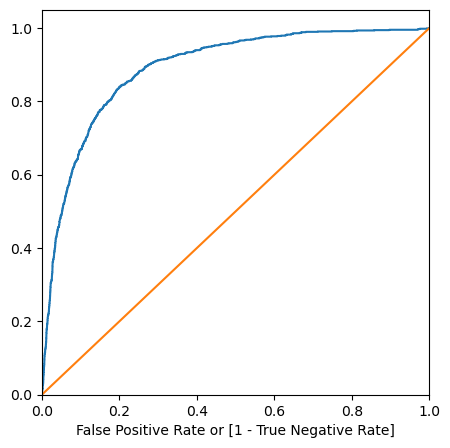

In [110]:
draw_roc(y_test_pred_final.Sub, y_test_pred_final.Sub_prob)

<AxesSubplot:>

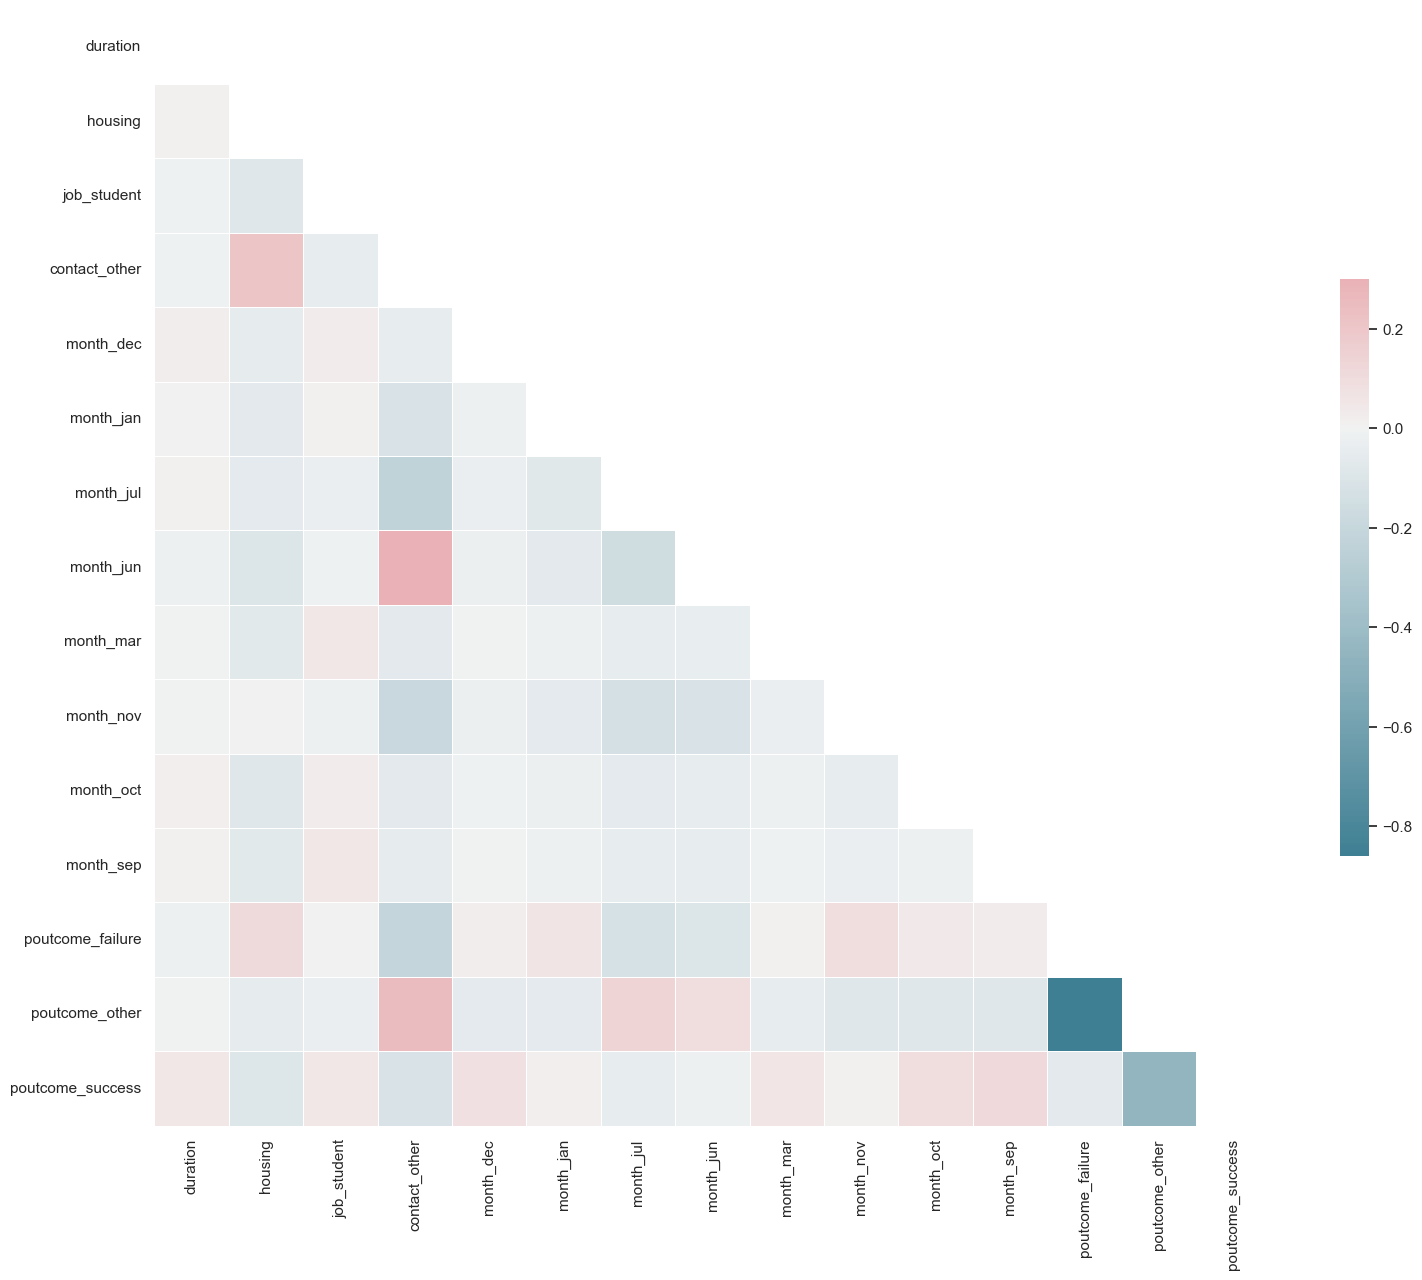

In [111]:
# New Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = x_train[x_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

# Sklearn Logistic Regression and Accuracy

In [112]:
accuracy={}

feature_selection=LogisticRegression()
feature_selection.fit(x_train[x_train.columns[rfe.support_]],y_train)
ACC=feature_selection.score(x_train[x_train.columns[rfe.support_]],y_train)*100



accuracy['logistic regression after feature selection']=ACC
print('test accuracy {:.2f}%'.format(ACC))

test accuracy 90.30%


# Accuracy on the Feature Selected features have 90.30% Accuracy which is still better as we have eliminated some of the features


In [113]:
accuracy={}

lr=LogisticRegression()
lr.fit(x_test,y_test)
acc=lr.score(x_test,y_test)*100
print(' accuracy test {:.2f}%'.format(acc))

 accuracy test 89.83%


# Accuracy on all the features is almost same as we have got for the feature selection features which is 90.30

In [114]:
y_predict=lr.predict(x_test)
y_pred=feature_selection.predict(x_test[x_test.columns[rfe.support_]])
print('without feature selection', '\n', cm(y_test,y_predict))
print('with feature matrix','\n', cm(y_test,y_pred))

without feature selection 
 [[7773  207]
 [ 713  350]]
with feature matrix 
 [[7763  217]
 [ 697  366]]


# print the classification report

In [115]:
print('Without Feature Selection','\n',report(y_test, y_predict))
print('After Feature Selection','\n',report(y_test, y_pred))

Without Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

After Feature Selection 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



# Check for overfitting and underfitting


In [116]:
lr.score(x_train,y_train)*100

90.06027427560275

In [117]:
lr.score(x_test,y_test)

0.8982638504920933

# the trainibleng test accuracy is 90.06% and test set accuracy is 89 % , this two values are quite compara

# Confusion matrix

In [118]:
y_predict=lr.predict(x_test)
print(cm(y_test,y_predict))

[[7773  207]
 [ 713  350]]


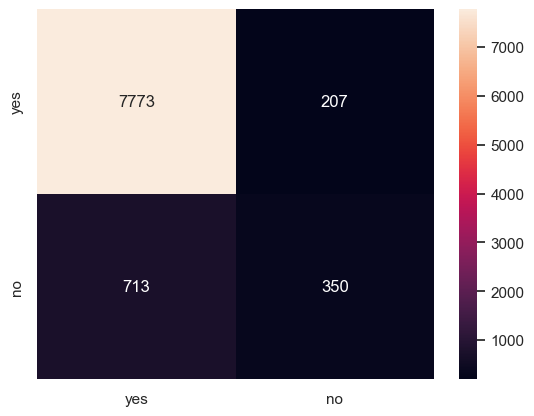

In [119]:
cm_df=cm(y_test,y_predict)
class_label=['yes','no']
df_cm=pd.DataFrame(cm_df,index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,fmt='d')
plt.xlabel=('predict label')
plt.ylabel=('actual label')
plt.show()

In [125]:
# save confusion matrix and slice into four pieces
confusion = cm(y_test, y_predict)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[7773  207]
 [ 713  350]]


In [126]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(ac(y_test, y_predict))

0.8982638504920933
0.8982638504920933


In [127]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - ac(y_test, y_predict))

0.10173614950790667
0.10173614950790666


In [128]:
recall = TP / float(FN + TP)

print(recall)
print(recall_score(y_test, y_predict))

0.3292568203198495
0.3292568203198495


In [129]:
specificity = TN / (TN + FP)

print(specificity)

0.9740601503759398


# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [130]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.02593984962406015
0.02593984962406015


# Precision: When a positive value is predicted, how often is the prediction correct?

In [131]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_predict))

0.6283662477558348
0.6283662477558348


# f1-score

In [132]:
f1_score = 2*((precision_score(y_test, y_predict) * recall_score(y_test, y_predict))/(precision_score(y_test, y_predict) + recall_score(y_test, y_predict)))
f1_score

0.43209876543209874

# The threshold level# 

In [133]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = lr.predict_proba(x_test)[0:10]

y_pred_prob

array([[0.99576994, 0.00423006],
       [0.20808702, 0.79191298],
       [0.98246235, 0.01753765],
       [0.98884608, 0.01115392],
       [0.97430948, 0.02569052],
       [0.97492075, 0.02507925],
       [0.97030216, 0.02969784],
       [0.97368042, 0.02631958],
       [0.93771164, 0.06228836],
       [0.98309345, 0.01690655]])

In [134]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No Subscription (0)', 'Prob of - Subscription (1)'])

y_pred_prob_df

,Prob of - No Subscription (0),Prob of - Subscription (1)
0,0.995770,0.004230
1,0.208087,0.791913
2,0.982462,0.017538
3,0.988846,0.011154
4,0.974309,0.025691
5,0.974921,0.025079
6,0.970302,0.029698
7,0.973680,0.026320
8,0.937712,0.062288
9,0.983093,0.016907


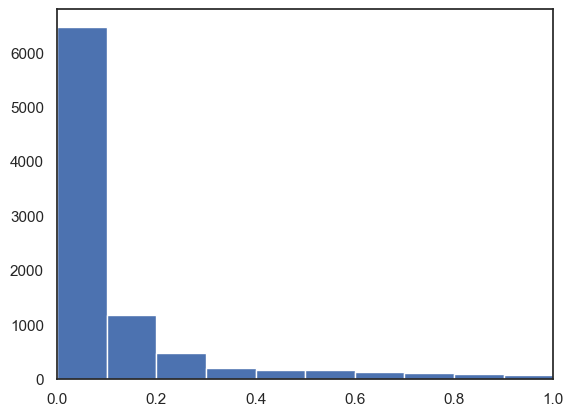

In [135]:
# store the predicted probabilities for class 1 - Probability of Subscription

y_pred1 = lr.predict_proba(x_test)[:, 1]
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title=('Histogram of predicted probabilities of Subscription')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel=('Predicted probabilities of Subscription')
plt.ylabel=('Frequency')

# ROC - AUC

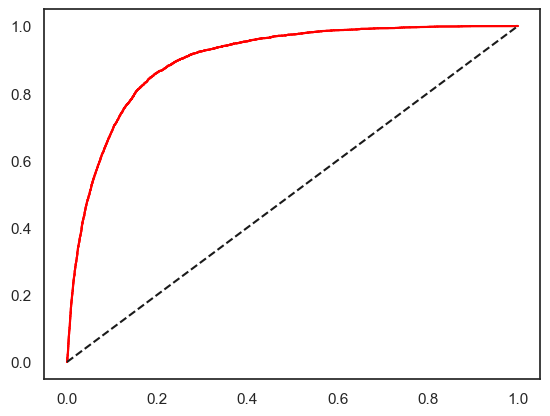

AUC-ROC Score: 0.6516584853478946


In [141]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title=('ROC curve for Subscription classifier')
plt.xlabel=('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel=('True Positive Rate')
plt.show()

print('AUC-ROC Score:',auc)

# ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

# So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [142]:
from sklearn.metrics import roc_auc_score
curve = roc_auc_score(y_test, y_predict)
print(curve)

0.6516584853478946


In [143]:
final_prediction = lr.predict_proba(x)[:,1]
fpr,tpr,thresholds=roc_curve(y,lr.predict_proba(x)[:,1])

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(ac(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
1598,0.376203,0.901241
1599,0.376121,0.901241
1595,0.376371,0.901241
1596,0.376249,0.901241
1566,0.381780,0.901241


In [144]:
print(report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.63      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [145]:
#Predictions
y_pred = lr.predict(x)

# Creating a datframe to with actual value and predicted value

predict = pd.DataFrame({'Actual':y,'Predicted':y_pred})
predict

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Key outcomes of the analysis are the recommendations for future marketing campaigns:



# `The customer's account balance has a huge influence on the campaign's outcome. People with account balance above 1490 are more likely to subscribe for term deposit, so future address those customers.


# The customer's age affects campaign outcome as well. Future campains should concentrate on customers from age categories below 30 years old and above 50 years old.

# Number of contacts with the customer during the campaign is also very important. The number of contacts with the customer shouldn't exceed 4.

